In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [188]:
import glob
import errno

def get_log_time(path):
    path = path.split("/")[-1]
    timestamp = path.split("_")[1]
    hour = timestamp.split("-")[0]
    if len(hour) > 2:
        hour=hour[0:2]
    return int(hour)

def get_dict(prov):
    path = '/Users/nidhikakulawaram/Downloads/single-datacenter-ftp-test/'+ prov + '/*.txt' #note C:
    files = glob.glob(path)
    latency = {}
    throughput = {}

    for name in files:
        hour = get_log_time(name)
        try:
            with open(name) as f:
                for line in f:
                    if 'Transferred:' in line: 
                        latency.setdefault(hour,[]).append(line.split()[7])
                    if 'Bytes per second:' in line:
                        throughput.setdefault(hour,[]).append(line.split()[6])
        except IOError as exc: #Not sure what error this is
            if exc.errno != errno.EISDIR:
                raise
    for t in latency.keys():
        latency[t] = latency[t][:10]
        throughput[t] = throughput[t][:10]
    return latency, throughput


In [189]:
def create_ping_scatter_plot(latencies_dict, cloud_provider, is_wan=False):
#     if is_wan:
#         for i in range(1,8):
#             y = latencies_dict[i]
#             plt.scatter([i] * len(y), y)
#         plt.xlabel("Hour of Day (CST)")
#         plt.title("{} WAN Ping Test".format(cloud_provider))
#         plt.xticks(range(1, 8, 1))
#     else:
    for xe, ye in zip(latencies_dict.keys(), latencies_dict.values()):
        plt.scatter([xe] * len(ye), ye, alpha = 0.5)
        plt.xlabel("Hour of Day (PST)")
        plt.title("{} Single D.C. Ping Test".format(cloud_provider))
        plt.xticks(range(0, 24, 1))
    #plt.yticks(np.arange(0, 1,0.1))
    plt.ylabel("Latency (ms)")
    plt.show()
    return

def create_avg_and_std_line_plots(latencies_dict, cloud_provider, is_wan=False):
#     if is_wan:
#         plt.plot(range(1, 8, 1), [np.mean(latencies_dict[i]) for i in range(1, 8)], label="avg latency")
#         plt.plot(range(1, 8, 1), [np.std(latencies_dict[i]) for i in range(1, 8)], label="std dev")
#         plt.xlabel("Hour of Day (CST)")
#         plt.xticks(range(0, 8, 1))
#         plt.title("{} WAN Ping Test".format(cloud_provider))
#     else:
    plt.plot(range(24), [np.mean(np.array(latencies_dict[i]).astype(np.float)) for i in range(24)], label="avg latency")
    plt.plot(range(24), [np.std(np.array(latencies_dict[i]).astype(np.float)) for i in range(24)], label="std dev")
    plt.xlabel("Hour of Day (UTC)")
    plt.xticks(range(0, 24, 1))
    plt.title("{} Single D.C. Ping Test".format(cloud_provider))
    plt.ylabel("Avg Latency / Std Dev (ms)")
    
    plt.legend()
    plt.show()

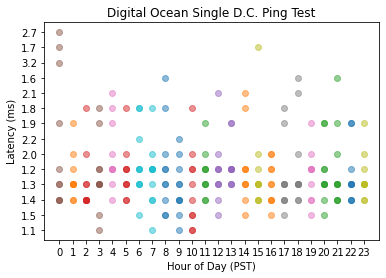

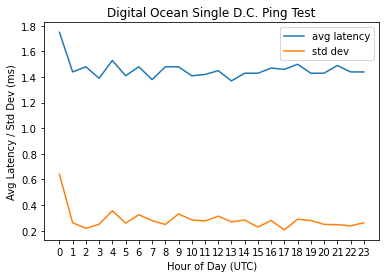

In [190]:
do_latency, do_throughput  = get_dict('digital-ocean')
create_ping_scatter_plot(do_latency, 'Digital Ocean')
create_avg_and_std_line_plots(do_latency, 'Digital Ocean', is_wan=False)

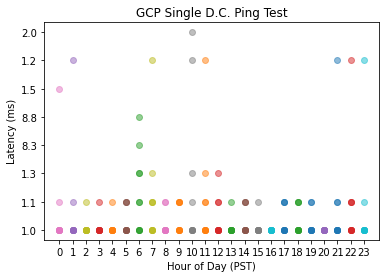

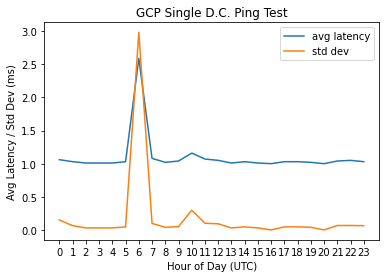

{19: ['1.0', '1.0', '1.0', '1.1', '1.0', '1.1', '1.0', '1.0', '1.0', '1.0'],
 4: ['1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.1', '1.0'],
 6: ['1.1', '1.3', '1.0', '1.0', '8.3', '8.8', '1.0', '1.1', '1.3', '1.0'],
 12: ['1.3', '1.0', '1.0', '1.0', '1.0', '1.1', '1.0', '1.1', '1.0', '1.0'],
 20: ['1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0'],
 5: ['1.0', '1.0', '1.1', '1.0', '1.0', '1.0', '1.1', '1.0', '1.1', '1.0'],
 0: ['1.5', '1.0', '1.0', '1.0', '1.0', '1.1', '1.0', '1.0', '1.0', '1.0'],
 15: ['1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.1'],
 2: ['1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.1', '1.0', '1.0', '1.0'],
 16: ['1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0'],
 21: ['1.0', '1.0', '1.0', '1.0', '1.1', '1.0', '1.1', '1.2', '1.0', '1.0'],
 9: ['1.1', '1.0', '1.0', '1.0', '1.1', '1.0', '1.0', '1.1', '1.0', '1.1'],
 18: ['1.0', '1.0', '1.1', '1.1', '1.0', '1.0', '1.0', '1.0', '1.0', '1.1'],
 22: 

In [191]:
gcp_latency, gcp_throughput  = get_dict('gcp')
create_ping_scatter_plot(gcp_latency, 'GCP')
create_avg_and_std_line_plots(gcp_latency, 'GCP', is_wan=False)
gcp_latency
#why is 8.3 and 8.8 randomly in the middle

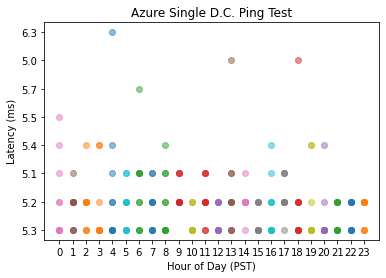

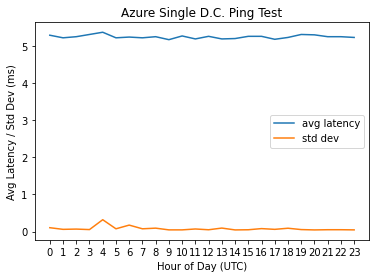

In [192]:
az_latency, az_throughput  = get_dict('azure')
create_ping_scatter_plot(az_latency, 'Azure')
create_avg_and_std_line_plots(az_latency, 'Azure', is_wan=False)

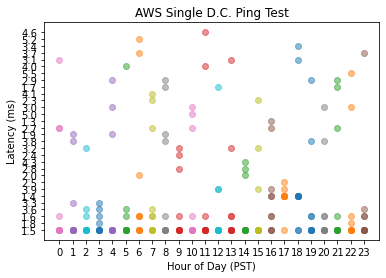

In [193]:
aws_latency, aws_throughput  = get_dict('AWS_scplogs')
create_ping_scatter_plot(aws_latency, 'AWS')

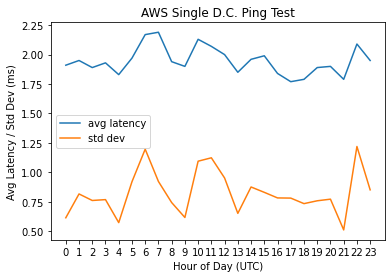

In [185]:
create_avg_and_std_line_plots(aws_latency, 'AWS', is_wan=False)

NameError: name 'gcp_transfer_time' is not defined

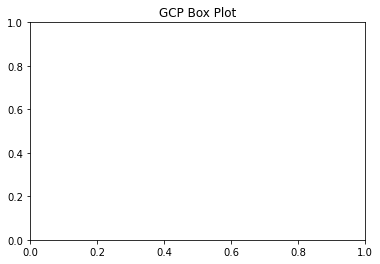

In [173]:
from scipy import stats
fig1, ax1 = plt.subplots()
ax1.set_title('GCP Box Plot')
ax1.boxplot(gcp_transfer_time)
print(stats.describe(gcp_transfer_time))

NameError: name 'az_transfer_time' is not defined

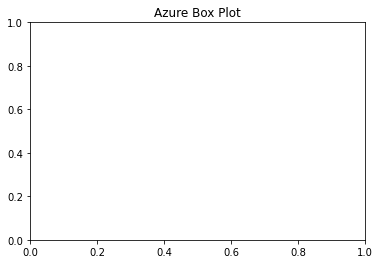

In [160]:

fig1, ax1 = plt.subplots()
ax1.set_title('Azure Box Plot')
ax1.boxplot(az_transfer_time)
print(stats.describe(az_transfer_time))

DescribeResult(nobs=240, minmax=(1.3, 5.5), mean=1.9454166666666666, variance=0.7352927126917711, skewness=1.8648230463746007, kurtosis=2.582462518947244)


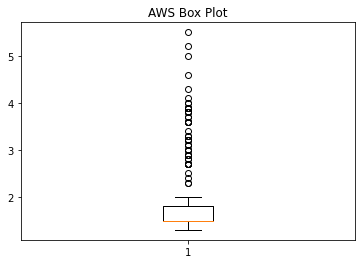

In [107]:

fig1, ax1 = plt.subplots()
ax1.set_title('AWS Box Plot')
ax1.boxplot(aws_transfer_time)
print(stats.describe(aws_transfer_time))

DescribeResult(nobs=240, minmax=(1.1, 3.2), mean=1.4579166666666665, variance=0.09416300557880056, skewness=1.773227333273958, kurtosis=4.304947269713784)


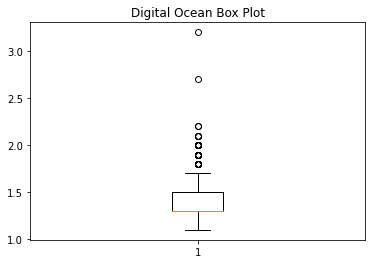

In [108]:
fig1, ax1 = plt.subplots()
ax1.set_title('Digital Ocean Box Plot')
ax1.boxplot(do_transfer_time)
print(stats.describe(do_transfer_time))